Business Analytics Model On a sales Dataset using the Random Forest Classifier

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
print(df.isnull().sum()) #identifying missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df. head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.drop(["Country"], inplace=True, axis=1)

In [7]:
# from pycaret.regression import *


# s = setup(data=df, target="Sales", session_id=123)
# best = compare_models()

In [8]:
df.select_dtypes(include="object").columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include="object").columns

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2,0,194,15,42420,2,0,4,261.9600,2,0.00,41.9136
1,2,0,194,15,42420,2,0,5,731.9400,3,0.00,219.5820
2,2,1,266,3,90036,3,1,10,14.6200,2,0.00,6.8714
3,3,0,153,8,33311,2,0,16,957.5775,5,0.45,-383.0310
4,3,0,153,8,33311,2,1,14,22.3680,2,0.20,2.5164


In [11]:
df.Category.unique()

array([0, 1, 2])

In [12]:
df["Sub-Category"].unique()

array([ 4,  5, 10, 16, 14,  9,  2, 13,  3,  1, 12,  0,  7,  8, 15, 11,  6])

In [13]:
df.State.unique()

array([15,  3,  8, 31, 45, 41, 47, 42, 25, 36, 11, 21, 20,  6, 12, 30,  1,
       44, 40,  0, 38, 35,  4, 13, 33, 23, 34, 29, 16,  5, 28, 19,  9, 26,
       37, 22,  2, 24, 27, 18,  7, 14, 43, 17, 39, 10, 32, 48, 46])

In [14]:
df.City.unique()

array([194, 266, 153,  96, 452, 154, 272, 513, 438, 158, 374, 351, 207,
       406, 321, 288, 129, 516, 124, 324, 329, 488,  80, 166, 464, 215,
       289, 116, 128,  93, 410, 300, 389, 427,  24,  74, 352, 494,  94,
        51, 521,  41, 375, 418, 210, 364, 330, 156, 451, 440, 134,  65,
       434, 308, 147, 172, 399, 187, 515,   2, 120, 109, 519, 423, 287,
       126, 123, 473, 448, 239, 437,  49,  73, 314,  83, 212, 472,  92,
        35, 474, 240,  16,  18, 184, 429, 262, 196, 317, 249,  25, 269,
       274, 189, 489, 393, 369, 121, 371, 245, 504, 295, 208, 407, 267,
       247,  64, 328, 164, 216,  23, 336, 361,   8, 257, 209, 150, 104,
       362,  21, 167, 175, 238, 310, 293, 177,   9, 283, 430, 243, 182,
       114, 503, 497, 303, 411, 378, 455, 498,  86, 493,  60, 511,  78,
        68, 360, 316, 197, 343, 145, 487, 105,  45, 241,  19, 236, 348,
       135, 446, 299, 151, 265, 256, 431, 326, 163, 340,   4, 485, 149,
       409, 486, 420,  42, 500, 319, 347, 505, 218, 428, 413,  5

In [15]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2,0,194,15,42420,2,0,4,261.9600,2,0.00,41.9136
1,2,0,194,15,42420,2,0,5,731.9400,3,0.00,219.5820
2,2,1,266,3,90036,3,1,10,14.6200,2,0.00,6.8714
3,3,0,153,8,33311,2,0,16,957.5775,5,0.45,-383.0310
4,3,0,153,8,33311,2,1,14,22.3680,2,0.20,2.5164


In [16]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2,0,194,15,42420,2,0,4,261.9600,2,0.00,41.9136
1,2,0,194,15,42420,2,0,5,731.9400,3,0.00,219.5820
2,2,1,266,3,90036,3,1,10,14.6200,2,0.00,6.8714
3,3,0,153,8,33311,2,0,16,957.5775,5,0.45,-383.0310
4,3,0,153,8,33311,2,1,14,22.3680,2,0.20,2.5164


In [17]:
df.tail(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,2,0,295,8,33180,2,0,9,25.248,3,0.2,4.1028
9990,3,0,104,3,92627,3,0,9,91.960,2,0.0,15.6332
9991,3,0,104,3,92627,3,2,13,258.576,2,0.2,19.3932
9992,3,0,104,3,92627,3,1,12,29.600,4,0.0,13.3200
9993,2,0,517,3,92683,3,1,1,243.160,2,0.0,72.9480


In [18]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   int64  
 1   Segment       9994 non-null   int64  
 2   City          9994 non-null   int64  
 3   State         9994 non-null   int64  
 4   Postal Code   9994 non-null   int64  
 5   Region        9994 non-null   int64  
 6   Category      9994 non-null   int64  
 7   Sub-Category  9994 non-null   int64  
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 937.1 KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ship Mode,9994.0,2.235041,1.100880,0.000,2.00000,3.0000,3.000,3.000
Segment,9994.0,0.658995,0.762622,0.000,0.00000,0.0000,1.000,2.000
City,9994.0,279.957274,139.157896,0.000,164.00000,295.0000,394.000,530.000
State,9994.0,22.343206,15.504611,0.000,4.00000,27.0000,36.000,48.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Region,9994.0,1.570642,1.162329,0.000,1.00000,1.0000,3.000,3.000
Category,9994.0,0.972584,0.629544,0.000,1.00000,1.0000,1.000,2.000
Sub-Category,9994.0,7.590454,5.051429,0.000,3.00000,9.0000,12.000,16.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000


Correlation Matrix (Raw):
               Ship Mode   Segment      City     State  Postal Code    Region  \
Ship Mode      1.000000 -0.004527 -0.003602  0.011865    -0.004068 -0.023809   
Segment       -0.004527  1.000000  0.005505 -0.002567    -0.010772 -0.005560   
City          -0.003602  0.005505  1.000000  0.009805     0.093806  0.282255   
State          0.011865 -0.002567  0.009805  1.000000    -0.285250 -0.444400   
Postal Code   -0.004068 -0.010772  0.093806 -0.285250     1.000000  0.474774   
Region        -0.023809 -0.005560  0.282255 -0.444400     0.474774  1.000000   
Category      -0.004129  0.010123  0.013736  0.006285    -0.002331 -0.005148   
Sub-Category  -0.003275  0.010943 -0.005966 -0.002061    -0.003788  0.009112   
Sales         -0.001887  0.010866  0.005592  0.004015    -0.023854  0.004216   
Quantity       0.022440  0.008130 -0.000929 -0.000836     0.012761  0.013506   
Discount      -0.000436 -0.016679 -0.151914  0.162552     0.058443 -0.212769   
Profit       

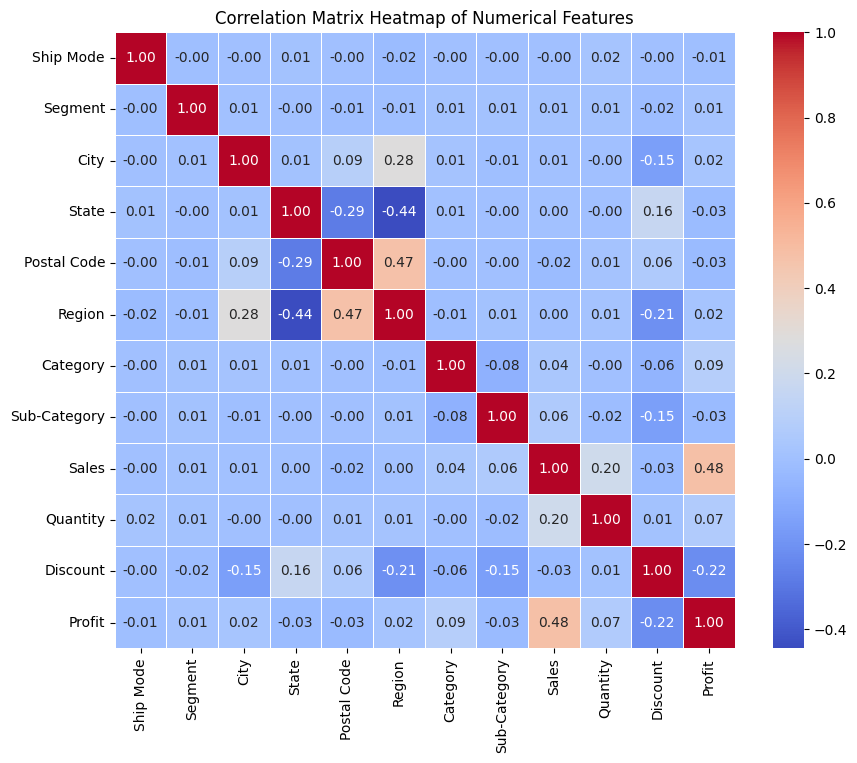

In [21]:
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Print the correlation matrix
print("Correlation Matrix (Raw):\n", correlation_matrix)

plt.figure(figsize=(10, 8)) # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap of Numerical Features')
plt.show()

In [22]:
# Spliting the data into features and target
X = df.drop(columns=['Sales'])
y = df['Sales']

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.ensemble import ExtraTreesRegressor # Import the Regressor

model = ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

print("\nEvaluating the model...")
y_pred = model.predict(X_test)


Evaluating the model...


In [26]:
y_pred[:10]

array([246.8644  ,  33.92016 ,  54.52908 , 531.493596, 376.44144 ,
        71.25944 , 369.91076 ,  17.3776  ,  20.32551 , 126.19976 ])

In [27]:
y_test[:10].values

array([563.808,  36.672,  37.3  , 212.058, 171.288,  99.136, 340.182,
        17.38 ,  22.62 ,  71.632])

In [28]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error


In [29]:
print("--- Model Evaluation ---")

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared (R2 Score): {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.2f}")

rmse = root_mean_squared_error(y_test, y_pred)
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.2f}")

--- Model Evaluation ---

R-squared (R2 Score): 0.6868

Mean Squared Error (MSE): 172173.74

Root Mean Squared Error (RMSE): 414.94

Mean Absolute Error (MAE): 81.16


### Predicted vs. Actual Values Scatter Plot

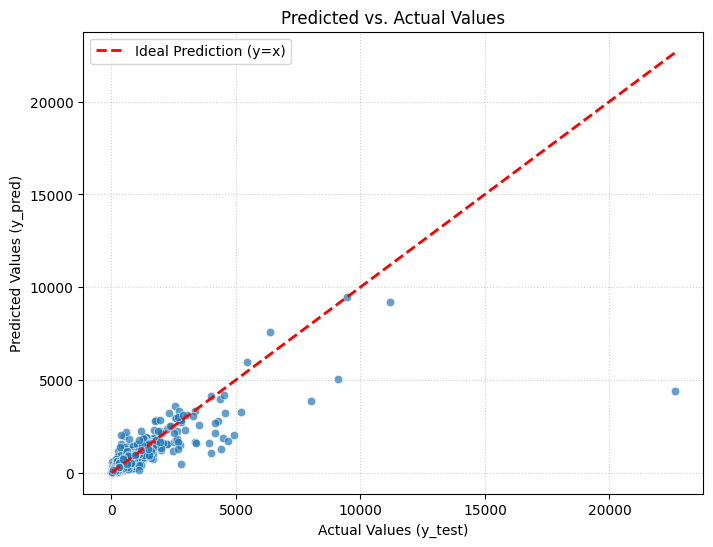

In [30]:
residuals = y_test - y_pred


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Ideal Prediction (y=x)')
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()


In [31]:
import joblib

joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'encoders.pkl')

['encoders.pkl']